# Black Friday EDA and Feature Engineering

## Cleaning and preprocessing the Data for Data Modelling

 # Problem statement:
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [1]:
# Importing the Required Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv("train.csv")
df_train.head(10)
df_train.shape

(550068, 12)

In [3]:
df_test = pd.read_csv("test.csv")
df_test.head(10)
df_test.shape

(233599, 11)

In [4]:
pd.concat([df_train, df_test]).shape

(783667, 12)

In [5]:
df = pd.concat([df_train, df_test])
df.nunique()
df.head(10)
df.shape

(783667, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [7]:
df.drop(columns='User_ID', inplace=True)

In [8]:
df.head(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [9]:
df.nunique()

Product_ID                     3677
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

### Mapping Gender that is Male with 1 and Female with 0

In [10]:
Gender_map = {'M': 1, 'F': 0}
df['Gender'] = df['Gender'].map(Gender_map)

In [11]:
df['Gender'].unique()
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [12]:
age_map = {
    '0-17' : 0,
    '18-25':1,
    '26-35':2,
    '36-45':3,
    '46-50':4,
    '51-55': 5,
    '55+': 6 
}
age_map

{'0-17': 0,
 '18-25': 1,
 '26-35': 2,
 '36-45': 3,
 '46-50': 4,
 '51-55': 5,
 '55+': 6}

In [13]:
df['Age'] = df['Age'].map(age_map)

In [14]:
age_count = df['Age'].value_counts().reset_index().sort_values(by = 'Age', ascending=True)
age_count

,Age,count
6,0,21334
2,1,141953
0,2,313015
1,3,156724
3,4,65278
4,5,54784
5,6,30579


In [15]:
df_city = pd.get_dummies(df['City_Category'], dtype=int,drop_first=True)

In [16]:
df = pd.concat([df,df_city], axis=1)
df.head(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [17]:
df.drop(columns='City_Category', inplace=True)
df.head(5)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,6,16,4+,0,8,NaN,NaN,7969.0,0,1


In [18]:
df.isna().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

## replacing missing values


In [19]:
df.dtypes

Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
B                               int64
C                               int64
dtype: object

In [20]:
df['Product_Category_2'].sort_values(ascending=True).unique()

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15., 16., 17., 18., nan])

In [21]:
df['Product_Category_2'].value_counts().sort_values(ascending=True)

Product_Category_2
7.0       854
18.0     4027
3.0      4123
10.0     4420
12.0     7801
9.0      8177
13.0    15054
17.0    19104
11.0    20230
6.0     23575
4.0     36705
5.0     37165
15.0    54114
16.0    61687
2.0     70498
14.0    78834
8.0     91317
Name: count, dtype: int64

In [22]:
df['Product_Category_2'].mode()[0]

8.0

In [23]:
df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0], inplace=True)

In [24]:
df['Product_Category_2'].isna().sum()

0

In [25]:
df['Product_Category_3'].sort_values(ascending=True).unique()

array([ 3.,  4.,  5.,  6.,  8.,  9., 10., 11., 12., 13., 14., 15., 16.,
       17., 18., nan])

In [26]:
df['Product_Category_3'].mode()[0]

16.0

In [27]:
df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0], inplace=True)

In [28]:
df['Product_Category_3'].isna().sum()

0

In [29]:
df.isna().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [30]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [31]:
df['Stay_In_Current_City_Years'].replace('4+', '4', inplace=True)

In [32]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [33]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [34]:
df.dtypes

Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
B                               int64
C                               int64
dtype: object

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 77.7+ MB


<Axes: >

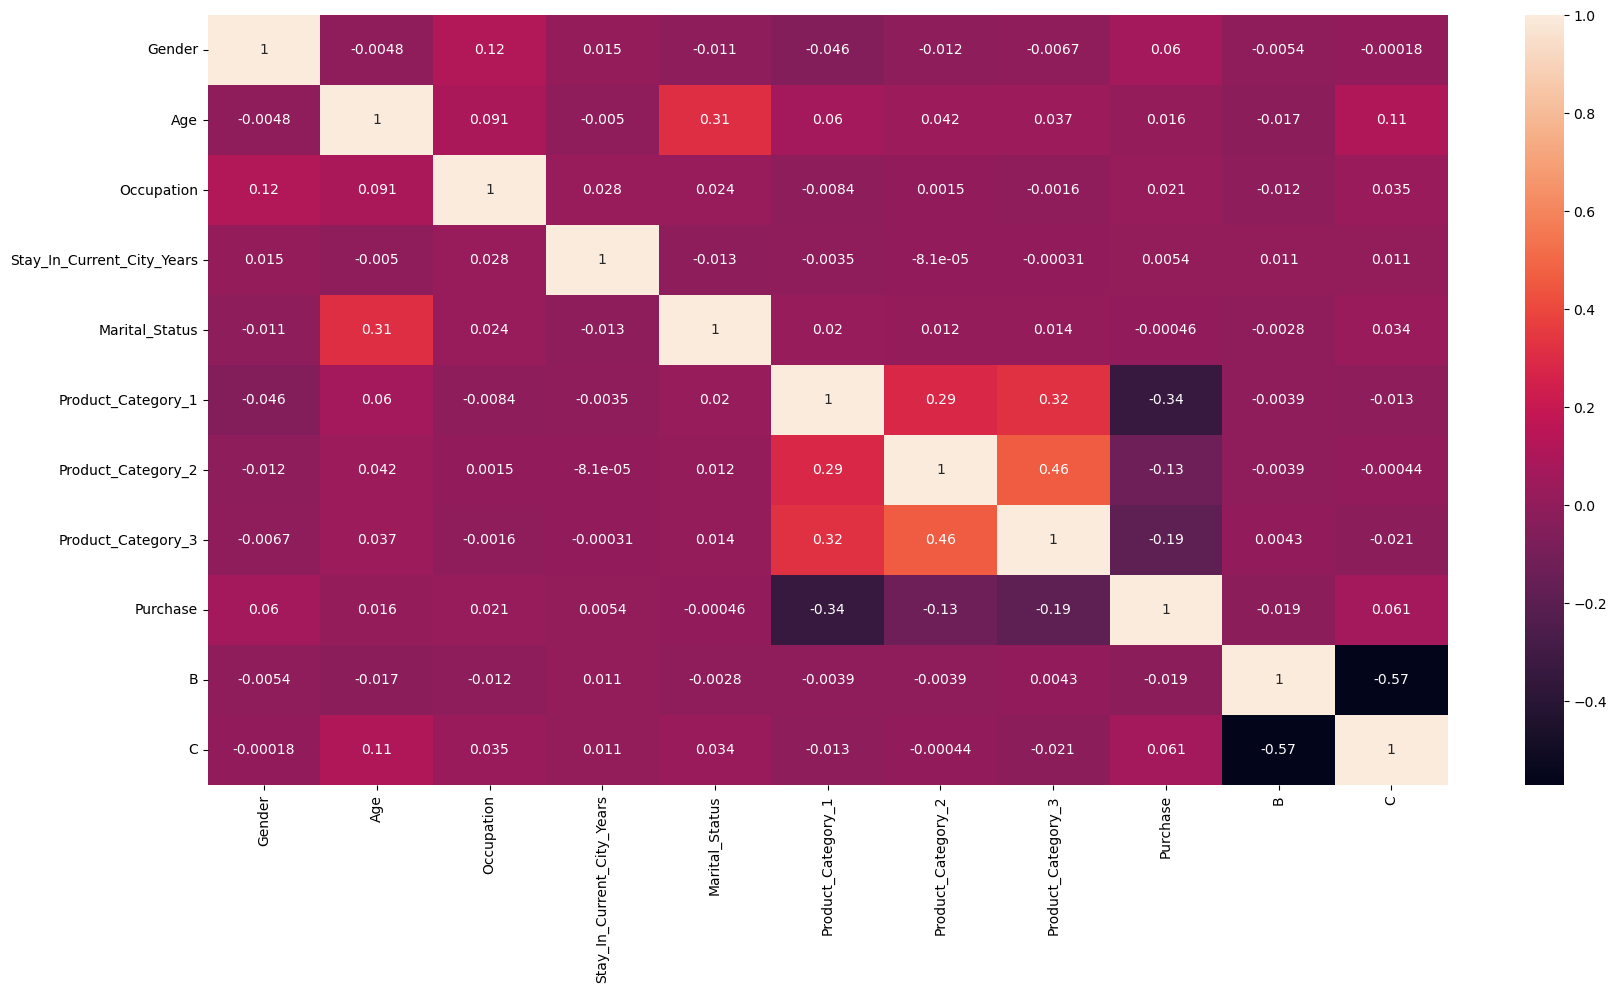

In [36]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)

/Users/badrinathsanagavaram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/badrinathsanagavaram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/badrinathsanagavaram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/badrinathsanagavaram/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

<Axes: xlabel='Age', ylabel='Purchase'>

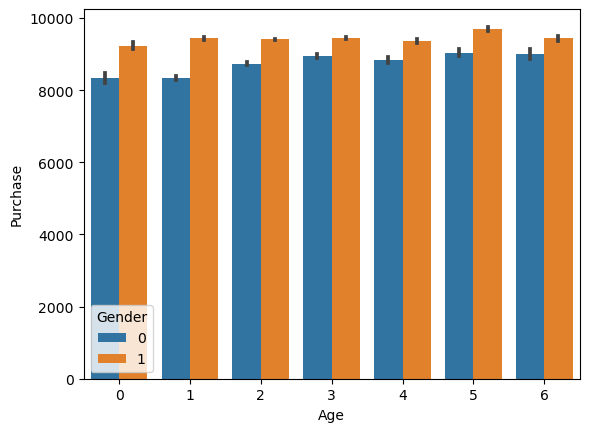

In [37]:
sns.barplot(
    data = df,
    x = df['Age'],
    y = df['Purchase'],
    hue= df['Gender']
           )

### We can conclude that Male gender has purchased more than Female gender